In [1]:
# Setup:

# common packages
import numpy as np
import pandas as pd
import random

# ML packages
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

# Visualization packages
import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# display options

# seed setup
seed = 2020

In [2]:
# Load data:
hotels_df = pd.read_csv("../data/raw/hotels_dataset.csv")

In [3]:
# Check full data:
hotels_df.shape

(119390, 32)

In [4]:
# Number of observations for the resort rotel
resort = hotels_df.loc[(hotels_df["hotel"] == "Resort Hotel")]
resort.shape

(40060, 32)

In [5]:
# Number of observations for the city rotel
city = hotels_df.loc[(hotels_df["hotel"] == "City Hotel")]
city.shape

(79330, 32)

## Summary of the data set

The data set used in this project comes from the Hotel Booking demand datasets from [Antonio, Almeida and Nunes, 2019](https://www.sciencedirect.com/science/article/pii/S2352340918315191#ack0005) and the data can be found from the GitHub Repository [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11). The dataset contains real world data obtained from two hotels: one resort hotel and one city hotel. Each row represents an individual hotel booking due to arrive between July 1st, 2015 and August 31st, 2017. There are 119390 observations in the data set, and 31 features. The following table shows the counts of observations for each hotel. 

| Resort Hotel | City Hotel |
| -----------: | ---------: |
|        40060 |      79330 |

Table 1: Counts of observation for each hotel. 

In [6]:
# Split data:
# 80% of observations are in the training and 20% of observations are in the test set
train_df, test_df = train_test_split(hotels_df, test_size=0.2, random_state=seed)

In [7]:
# Data inspection:
train_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
74159,City Hotel,1,349,2015,October,40,1,0,2,2,...,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled,2015-01-01
59282,City Hotel,1,254,2016,October,44,25,0,5,2,...,No Deposit,9.0,NaN,0,Transient,90.95,0,0,Canceled,2016-02-17
56463,City Hotel,1,174,2016,September,37,7,0,1,2,...,No Deposit,9.0,NaN,0,Transient,126.90,0,2,Canceled,2016-08-24
94823,City Hotel,0,169,2016,August,32,5,2,4,2,...,No Deposit,9.0,NaN,0,Transient,99.45,0,1,Check-Out,2016-08-11
247,Resort Hotel,1,69,2015,July,28,9,2,6,2,...,No Deposit,240.0,NaN,0,Transient,118.13,0,2,Canceled,2015-05-13


In [8]:
# Data inspection:
train_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95508.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,82411.000000,5441.000000,95512.000000,95512.000000,95512.000000,95512.000000
mean,0.370707,104.108049,2016.157907,27.162430,15.792717,0.927171,2.499246,1.855421,0.103552,0.007873,0.031609,0.088282,0.136684,0.221899,86.547136,188.947988,2.284278,101.701882,0.062568,0.570975
std,0.482997,106.774050,0.706551,13.615684,8.773898,1.000599,1.913424,0.589122,0.398279,0.094784,0.174957,0.870309,1.479877,0.658002,110.632486,131.549836,17.314980,51.089236,0.245705,0.792781
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# Data inspection:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 74159 to 41824
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   is_canceled                     95512 non-null  int64  
 2   lead_time                       95512 non-null  int64  
 3   arrival_date_year               95512 non-null  int64  
 4   arrival_date_month              95512 non-null  object 
 5   arrival_date_week_number        95512 non-null  int64  
 6   arrival_date_day_of_month       95512 non-null  int64  
 7   stays_in_weekend_nights         95512 non-null  int64  
 8   stays_in_week_nights            95512 non-null  int64  
 9   adults                          95512 non-null  int64  
 10  children                        95508 non-null  float64
 11  babies                          95512 non-null  int64  
 12  meal                        

In [10]:
# Number of observations for the resort rotel in training data set:
train_df_resort = train_df.loc[(train_df["hotel"] == "Resort Hotel")]
print(train_df_resort.shape)
test_df_resort = test_df.loc[(test_df["hotel"] == "Resort Hotel")]
print(test_df_resort.shape)

(31994, 32)
(8066, 32)


In [11]:
# Number of observations for the city rotel in training data set:
train_df_city = train_df.loc[(train_df["hotel"] == "City Hotel")]
print(train_df_city.shape)
test_df_city = test_df.loc[(test_df["hotel"] == "City Hotel")]
print(test_df_city.shape)

(63518, 32)
(15812, 32)


In [12]:
# Check missing values:
train_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             383
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13101
company                           90071


In [13]:
# Replace missing values:
# for "agent": if no agency is given, we assume the booking was made without agency.
# for "company": if no company is given, we assume the booking was made by individuals.
replacements = {"children:": 0.0, "country": "Unknown", "agent": 0, "company": 0}
train_df_nan = train_df.fillna(replacements)

# Combine same meaning values:
# for "meal": "undefined" and "SC" have the same meaning
train_df_nan["meal"].replace("Undefined", "SC", inplace=True)

# Some rooms have 0 adults, 0 children and 0 babies,
# uncomment below to drop these "ghost" rooms
# empty_room = list(full_data_cln.loc[full_data_cln["adults"]
#                    + full_data_cln["children"]
#                    + full_data_cln["babies"]==0].index)
# full_data_cln.drop(full_data_cln.index[empty_room], inplace=True)

In [14]:
# Check data left:
train_df_nan.shape

(95512, 32)

## Splitting the data set into training and test data sets

- 80% of observations are in the training and 20% of observations are in the test set

| Data partition | Resort Hotel | City Hotel |
| :------------- | -----------: | ---------: |
| Training       |        31994 |      63518 |
| Test           |         8066 |      15812 |

Table 2: Counts of observation for each hotel for each data partition

- minor class imbalance
- There are 4 observations with missing values in `children` variable, replaced with 0; 
- 383 observations with missing values in `country` variable, replaced with "Unknown"; 
- 13101 observations with missing values in `agent` variable, replaced with 0, as we assume those bookings were made without agency; 
- 90071 observations with missing values in `company` variable, replaced with 0, as we assume those bookings was made by individuals. 

## Exploratory data analysis on the training data set

In [15]:
# Split the features and targets:
X_train = train_df_nan.drop(["is_canceled"], axis=1)
y_train = train_df_nan["is_canceled"]
X_test = test_df.drop(["is_canceled"], axis=1)
y_test = test_df["is_canceled"]

In [16]:
# Seperate Resort adn City Hotel:
resort_train = X_train.loc[(X_train["hotel"] == "Resort Hotel")].copy()
city_train = X_train.loc[(X_train["hotel"] == "City Hotel")].copy()

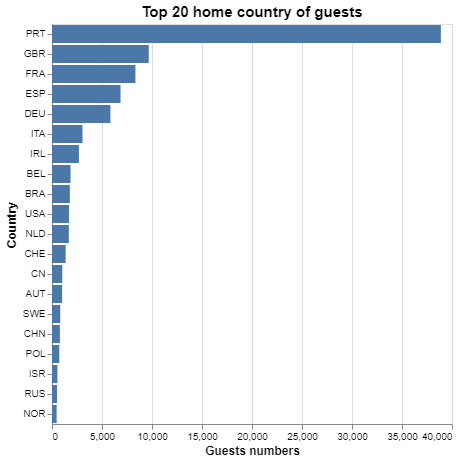

In [17]:
top_20_countries = (
    X_train.groupby("country")
    .size()
    .reset_index(name="counts")
    .sort_values(by="counts", ascending=False)[:20]
)

alt.Chart(top_20_countries, title="Top 20 home country of guests").mark_bar().encode(
    alt.X("counts", title="Guests numbers"),
    alt.Y("country", sort="-x", title="Country"),
    alt.Tooltip("country"),
).configure_axis(labelFontSize=10, titleFontSize=12).configure_title(fontSize=15)

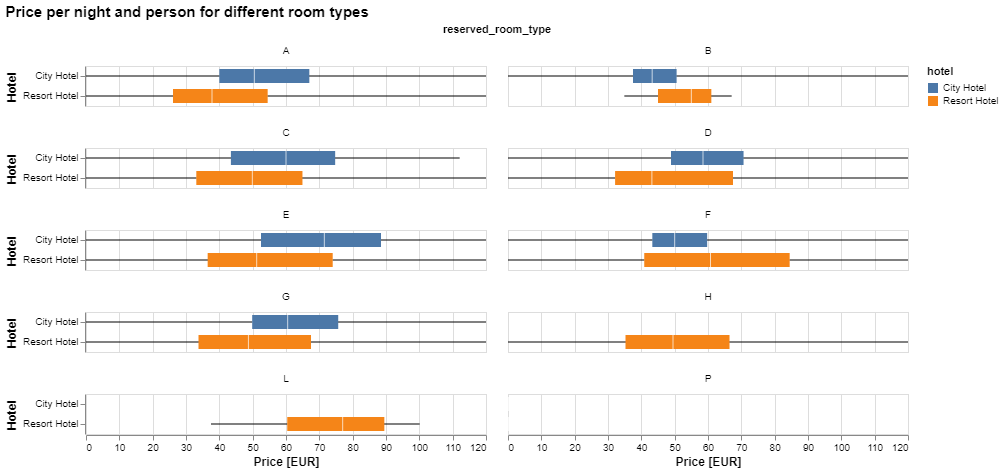

In [18]:
# Counting adults and children as paying guests only, not babies.

X_train["adr_ac"] = X_train["adr"] / (X_train["adults"] + X_train["children"])
room_price = X_train[["hotel", "reserved_room_type", "adr_ac"]].sort_values(
    "reserved_room_type"
)

alt.Chart(room_price).mark_boxplot(extent="min-max", clip=True).encode(
    alt.X("adr_ac", title="Price [EUR]", scale=alt.Scale(domain=(0, 120))),
    alt.Y("hotel", title="Hotel"),
    color="hotel",
).facet(
    "reserved_room_type",
    columns=2,
    title="Price per night and person for different room types",
).configure_axis(
    labelFontSize=10, titleFontSize=12
).configure_title(
    fontSize=15
)

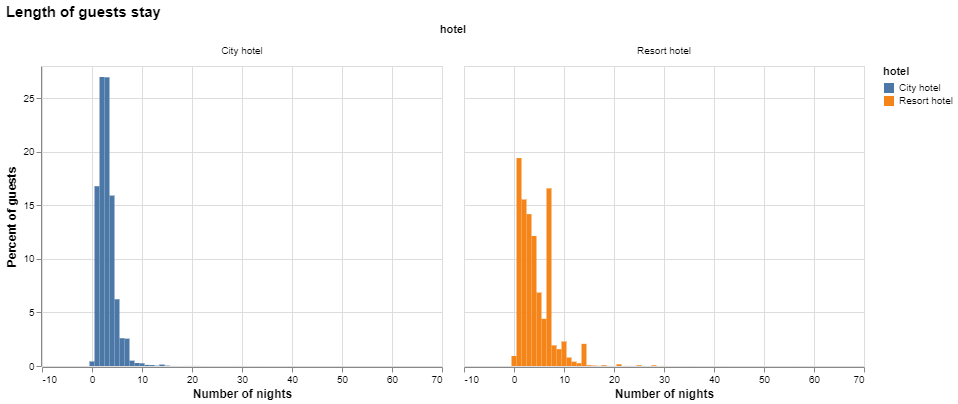

In [19]:
resort_train["total_nights"] = (
    resort_train["stays_in_weekend_nights"] + resort_train["stays_in_week_nights"]
)
city_train["total_nights"] = (
    city_train["stays_in_weekend_nights"] + city_train["stays_in_week_nights"]
)

num_nights_resort = list(resort_train["total_nights"].value_counts().index)
num_bookings_resort = list(resort_train["total_nights"].value_counts())
rel_bookings_resort = (
    resort_train["total_nights"].value_counts() / sum(num_bookings_resort) * 100
)  # convert to percent

num_nights_city = list(city_train["total_nights"].value_counts().index)
num_bookings_city = list(city_train["total_nights"].value_counts())
rel_bookings_city = (
    city_train["total_nights"].value_counts() / sum(num_bookings_city) * 100
)  # convert to percent

resort_nights = pd.DataFrame(
    {
        "hotel": "Resort hotel",
        "num_nights": num_nights_resort,
        "rel_num_bookings": rel_bookings_resort,
    }
)

city_nights = pd.DataFrame(
    {
        "hotel": "City hotel",
        "num_nights": num_nights_city,
        "rel_num_bookings": rel_bookings_city,
    }
)

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)
nights_data

alt.Chart(nights_data).mark_bar().encode(
    alt.X("num_nights", title="Number of nights"),
    alt.Y("rel_num_bookings", title="Percent of guests"),
    color="hotel",
).facet("hotel", title="Length of guests stay").configure_axis(
    labelFontSize=10, titleFontSize=12
).configure_title(
    fontSize=15
)